# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
Processing Record 1 of Set 1 | keflavik
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | saipan
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | banjarmasin
Processing Record 8 of Set 1 | danville
Processing Record 9 of Set 1 | nikolayevsk-on-amure
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | lodwar
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | howard springs
Processing Record 18 of Set 1 | kapuskasing
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | alto araguaia
Processing 

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,keflavik,64.0049,-22.5624,277.39,75,75,15.95,IS,1702647571
1,bredasdorp,-34.5322,20.0403,295.82,49,10,6.82,ZA,1702647571
2,albany,42.6001,-73.9662,278.47,75,11,3.00,US,1702647572
3,saipan,15.1355,145.7010,300.54,83,75,6.69,MP,1702647573
4,college,64.8569,-147.8028,241.12,71,75,0.00,US,1702647574


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keflavik,64.0049,-22.5624,277.39,75,75,15.95,IS,1702647571
1,bredasdorp,-34.5322,20.0403,295.82,49,10,6.82,ZA,1702647571
2,albany,42.6001,-73.9662,278.47,75,11,3.00,US,1702647572
3,saipan,15.1355,145.7010,300.54,83,75,6.69,MP,1702647573
4,college,64.8569,-147.8028,241.12,71,75,0.00,US,1702647574


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

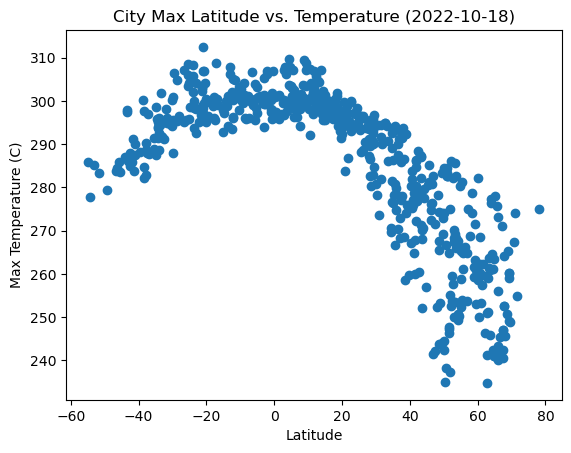

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

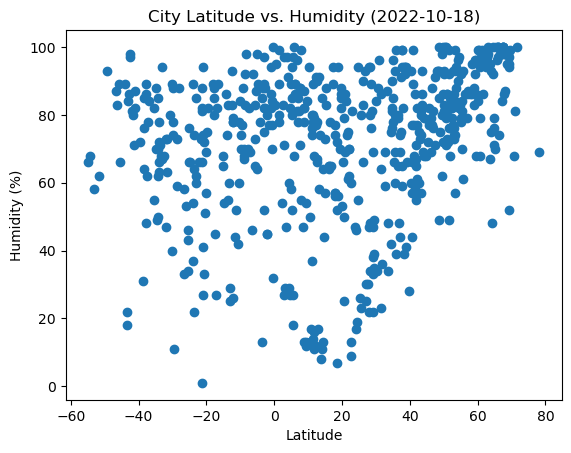

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

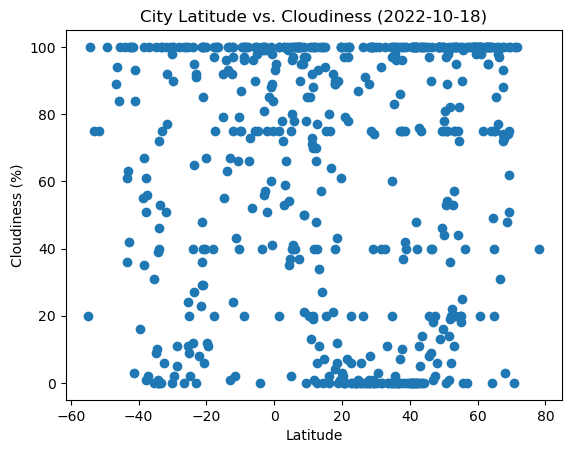

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

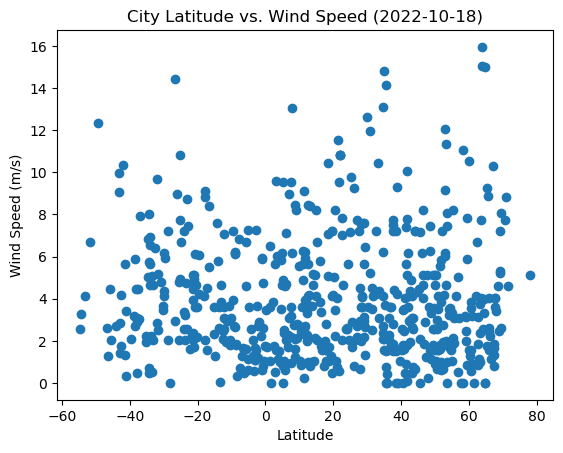

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keflavik,64.0049,-22.5624,277.39,75,75,15.95,IS,1702647571
2,albany,42.6001,-73.9662,278.47,75,11,3.00,US,1702647572
3,saipan,15.1355,145.7010,300.54,83,75,6.69,MP,1702647573
4,college,64.8569,-147.8028,241.12,71,75,0.00,US,1702647574
5,udachny,66.4167,112.4000,241.73,74,97,2.24,RU,1702647575


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,295.82,49,10,6.82,ZA,1702647571
6,banjarmasin,-3.3244,114.5910,300.23,88,99,0.58,ID,1702647576
9,port elizabeth,-33.9180,25.5701,295.31,66,40,5.66,ZA,1702647579
11,port-aux-francais,-49.3500,70.2167,279.47,93,100,12.32,TF,1702647580
13,grytviken,-54.2811,-36.5092,277.68,68,100,3.28,GS,1702647582


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7356731707803358


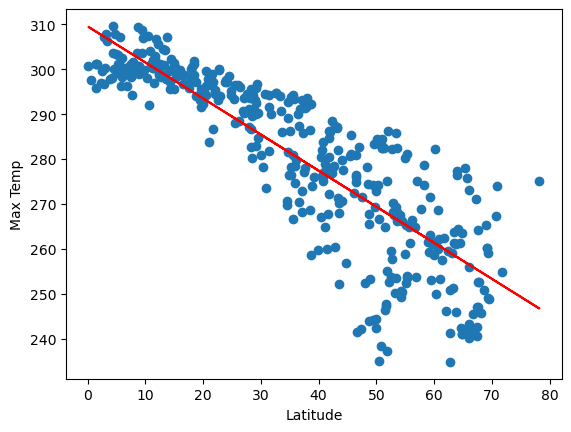

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.4471665080333471


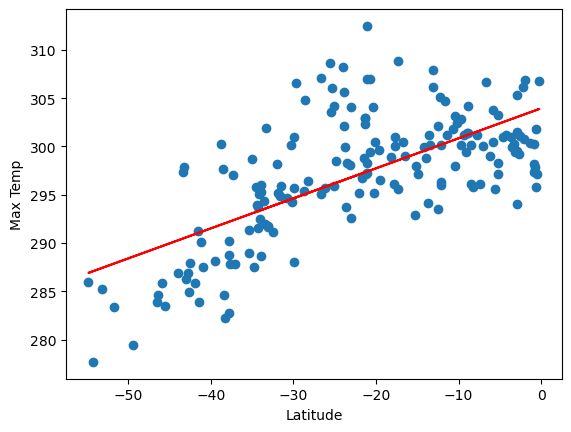

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There's a positive linear trend

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1473918068038802


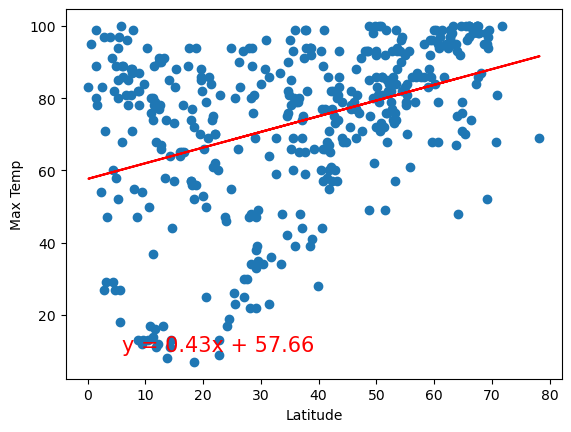

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0019246741884831565


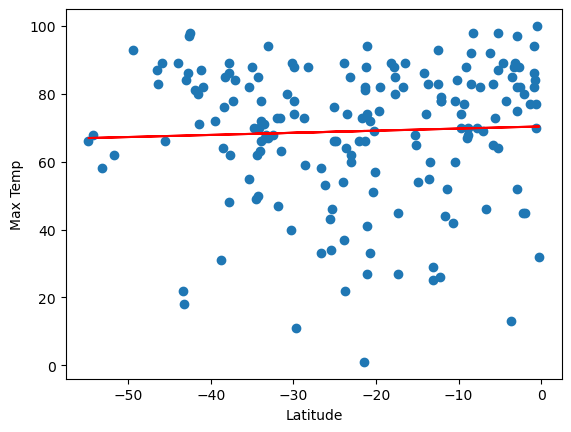

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There's a positive linear trend

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009246312907551164


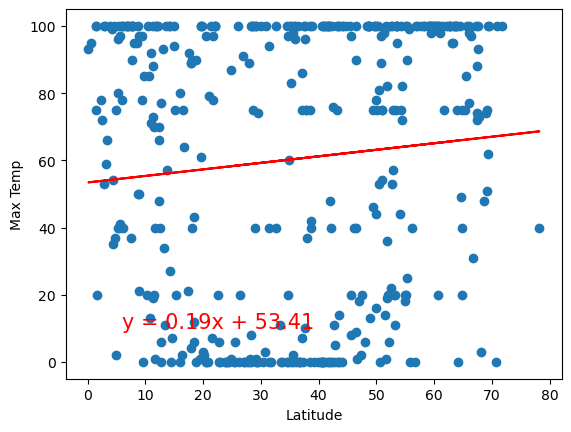

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04064617743524418


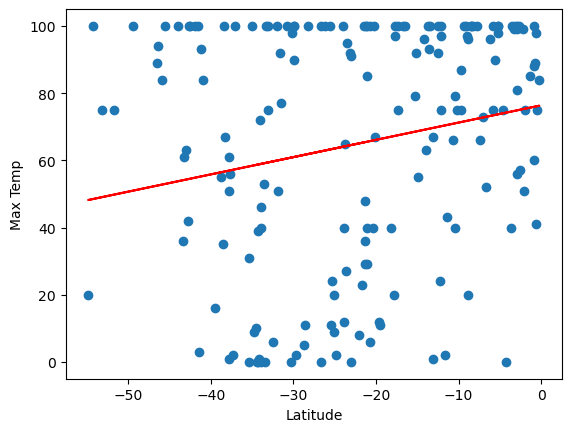

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There's a positive linear trend

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 6.825857421418755e-05


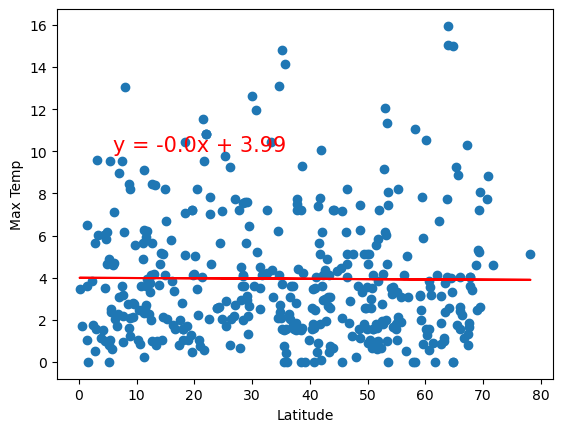

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04347626492413558


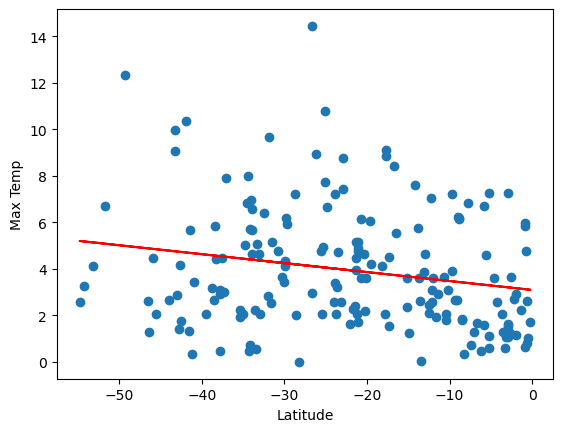

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There's a positive linear trend